In this test, I aim to verify the correctness of the `ClassicalShadow_1_CLIFFORD` approximation. To do this, I will override the `get_random_rotations` method. Specifically, it will be modified to always return the Hadamar operator. When this is applied to a simple $|0\rangle$ state, it becomes poblaistic but possible calculate the density matrix that the shadow should approximate.

In [4]:
# Imports
import sys

sys.path.insert(0, "../../..")

from qiskit import QuantumCircuit, qasm2
from qiskit.quantum_info import Clifford, StabilizerState
from qiskit.visualization import array_to_latex
from qiskit_aer import AerSimulator
import random
from visualisation import LiveVisualizer
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford
from qiskit_aer import AerSimulator

from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol


from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol

In [ ]:
# Setup Experiment
class Id_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 2
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(2)
        circuit.h(0)
        circuit.cx(0,1)
        return circuit

    def run_circuit_and_get_measurement(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        bit_list =  [int(bit) for bit in list(max_hits)]
        return bit_list[::-1] 
    
id_protocol = Id_Protocol()
# Create Classical Shadow Instance
always_id = ClassicalShadow_1_CLIFFORD(id_protocol)


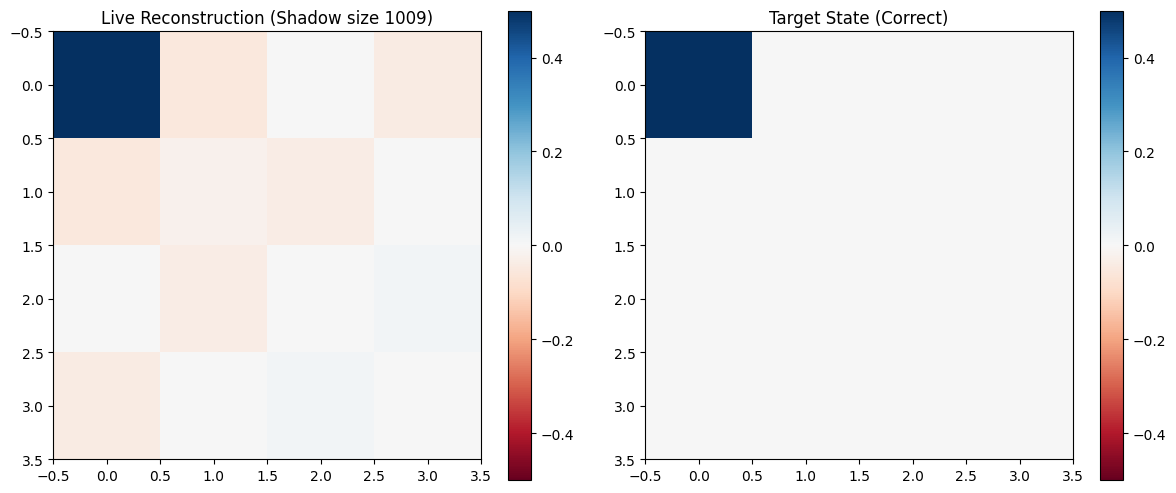

KeyboardInterrupt: 

In [6]:
target_density_matrix = always_id.get_original_density_matrix()
vis = LiveVisualizer(target_density_matrix)


while True:
    always_id.add_snapshot()
    
    if always_id.get_shadow_size() > 1000:
        actual_density_matrix = always_id.get_density_matrix_from_cliffords()

        vis.update(actual_density_matrix,always_id.get_shadow_size()) 